# Bird Species Classification Challenge
## problem Definition:
**Classify the bird on the bases of some features**
## Data:
**Got this Dataset from bitgrit:**
    https://bitgrit.net/competition/16
## Evalution:
1. Confusion matrix
2. accuracy
3. Precision, Recall, F1-score
## Features
- 'species': animal species (A, B, C)
- 'bill_length': bill length (mm)
- 'bill_depth': bill depth (mm)
- 'wing_length': wing length (mm)
- 'mass': body mass (g)
- 'location': island type (Location 1, 2, 3)
- 'sex': animal sex (0: Male; 1: Female; NA: Unknown)

In [1]:
%config Completer.use_jedi = False

In [2]:
#import some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
#import dataset
df=pd.read_csv('../input/bird-species/training_set.csv')
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103


In [5]:
y_df=pd.read_csv('../input/bird-species/training_target.csv')
y_df.head()

,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C


In [6]:
len(y_df)==len(df)

True

In [7]:
df=pd.concat([df,y_df],axis=1)

In [8]:
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID,ID,species
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284,284,C
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101,101,C
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400,400,B
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98,98,C
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103,103,C


In [9]:
#lets observe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bill_depth   434 non-null    float64
 1   bill_length  295 non-null    float64
 2   wing_length  298 non-null    float64
 3   location     405 non-null    object 
 4   mass         433 non-null    float64
 5   sex          379 non-null    float64
 6   ID           435 non-null    int64  
 7   ID           435 non-null    int64  
 8   species      435 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 30.7+ KB


In [10]:
df.isna().sum()

bill_depth       1
bill_length    140
wing_length    137
location        30
mass             2
sex             56
ID               0
ID               0
species          0
dtype: int64

In [11]:
len(df)

435

<Figure size 432x288 with 0 Axes>

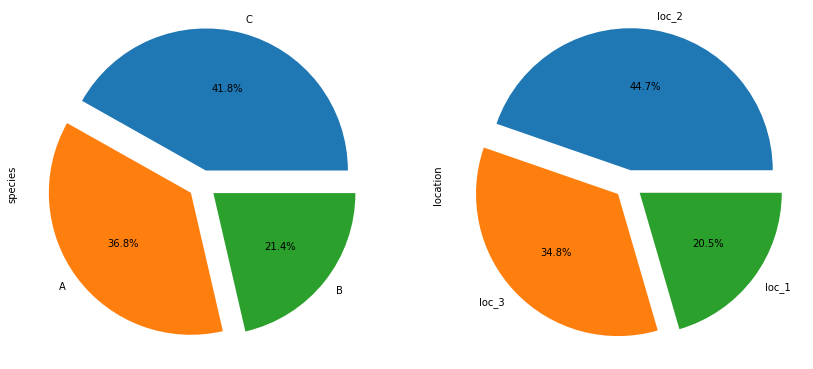

In [12]:
plt.figure()
fig, ax = plt.subplots(1,2,figsize=(14,14))
plt.subplot(1, 2, 1)
df['species'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1]);
plt.subplot(1, 2, 2)
df['location'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1]);

In [13]:
import re
loc_Pattern='loc_(\d{1})'

In [14]:
df['location']=df['location'].fillna('loc_4') 
# location nan =4

In [15]:
df.isna().sum()

bill_depth       1
bill_length    140
wing_length    137
location         0
mass             2
sex             56
ID               0
ID               0
species          0
dtype: int64

In [16]:
def get_num(loca):
        return int(str(loca).split('_')[1])

In [17]:
df['location']=df['location'].apply(get_num)

In [18]:
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID,ID,species
0,14.300000,48.200000,210.000000,2,4600.0,0.0,284,284,C
1,14.400000,48.400000,203.000000,2,4625.0,0.0,101,101,C
2,18.400000,NaN,200.000000,3,3400.0,0.0,400,400,B
3,14.982114,47.504878,NaN,4,4800.0,0.0,98,98,C
4,18.982114,38.259307,217.186992,3,5200.0,0.0,103,103,C


In [19]:
df=df.drop('ID',axis=1)

In [20]:
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,species
0,14.300000,48.200000,210.000000,2,4600.0,0.0,C
1,14.400000,48.400000,203.000000,2,4625.0,0.0,C
2,18.400000,NaN,200.000000,3,3400.0,0.0,B
3,14.982114,47.504878,NaN,4,4800.0,0.0,C
4,18.982114,38.259307,217.186992,3,5200.0,0.0,C


In [21]:
df['sex'].dtype

dtype('float64')

In [22]:
##sex 0 for male and 1 for female and 2 for unknown
df['sex']=df['sex'].fillna('2')

In [25]:
df['sex']=df['sex'].astype('int')

In [27]:
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,species
0,14.300000,48.200000,210.000000,2,4600.0,0,C
1,14.400000,48.400000,203.000000,2,4625.0,0,C
2,18.400000,NaN,200.000000,3,3400.0,0,B
3,14.982114,47.504878,NaN,4,4800.0,0,C
4,18.982114,38.259307,217.186992,3,5200.0,0,C


In [28]:
df.isna().sum()

bill_depth       1
bill_length    140
wing_length    137
location         0
mass             2
sex              0
species          0
dtype: int64

In [29]:
df[df['bill_depth'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex,species
180,NaN,NaN,NaN,1,NaN,2,A


In [30]:
df=df[df['bill_depth'].notna()]

In [31]:
df[df['mass'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex,species
298,18.982114,38.259307,193.186992,1,NaN,1,C


In [32]:
species_c_mass=df[(df['species']=='C') & (df['sex']==1) & (df['location']==1)]['mass']

In [33]:
def outlier_remover(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            print(col)
            print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
            print(lower ,">",col,"<",upper)
            plt.figure(figsize=(15,5))
            sns.boxplot(df[col],palette="Set2")
            plt.show()
            df=df[(df[col]>=lower) & (df[col]<=upper)]
    return df

In [34]:
def series_outlier_check(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
    print(lower ,"> column <",upper)
    plt.figure(figsize=(15,5))
    sns.boxplot(col,palette="Set2")
    plt.show()
    col=col.fillna((col.mean()+Q3)/2)
    return col

In [35]:
df.isna().sum()

bill_depth       0
bill_length    139
wing_length    136
location         0
mass             1
sex              0
species          0
dtype: int64

Q1 =  4743.75  Q3 =  5587.5  IQR =  843.75
3478.125 > column < 6853.125


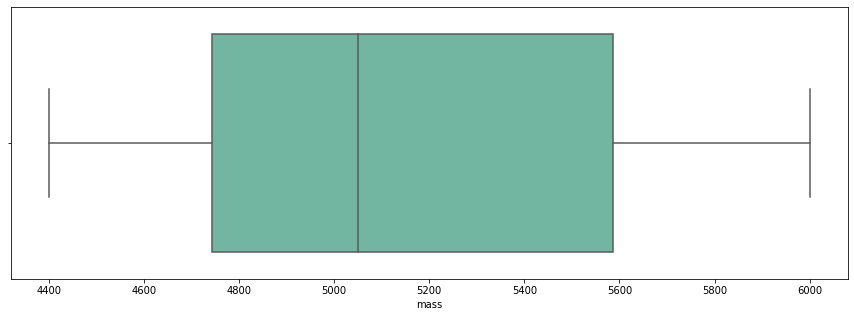

In [36]:
    Q1=species_c_mass.quantile(0.25)
    Q3=species_c_mass.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
    print(lower ,"> column <",upper)
    plt.figure(figsize=(15,5))
    sns.boxplot(species_c_mass,palette="Set2")
    plt.show()
    df['mass']=df['mass'].fillna((species_c_mass.mean()+Q3)/2)

In [37]:
len(df)

434

In [38]:
loc_1=df[df['location']==1]
loc_2=df[df['location']==2]
loc_3=df[df['location']==3]
loc_4=df[df['location']==4]

Q1 =  38.7913907284768  Q3 =  48.8338235294118  IQR =  10.042432800935003
23.727741527074294 > column < 63.89747273081431


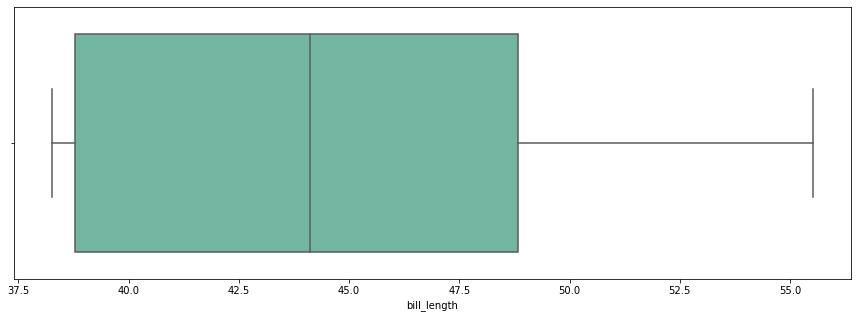

Q1 =  44.1182007284768  Q3 =  49.150000000000006  IQR =  5.031799271523205
36.570501821191996 > column < 56.69769890728482


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


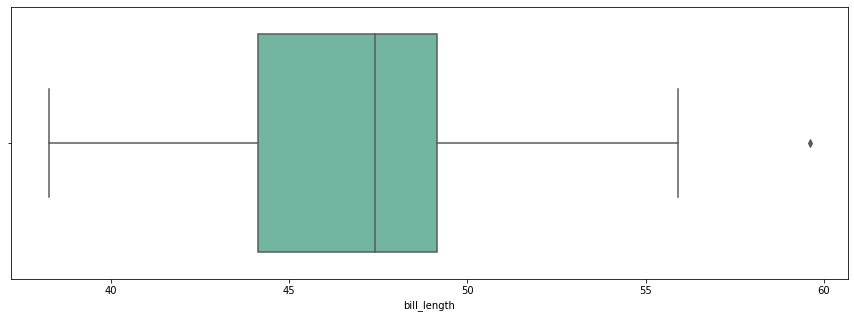

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Q1 =  43.0  Q3 =  49.15  IQR =  6.149999999999999
33.775000000000006 > column < 58.375


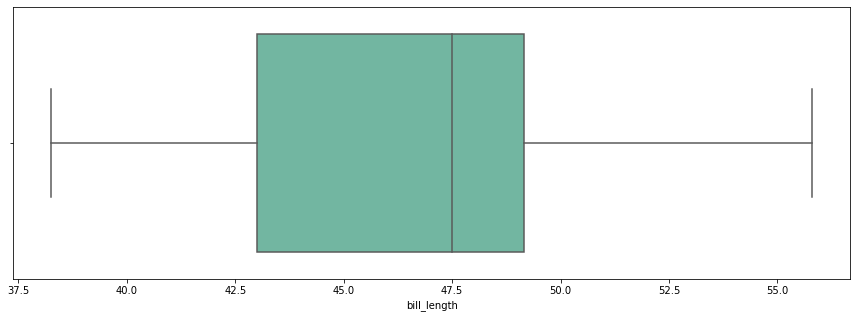

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
loc_1['bill_length']=series_outlier_check(loc_1['bill_length'])
loc_2['bill_length']=series_outlier_check(loc_2['bill_length'])
loc_3['bill_length']=series_outlier_check(loc_3['bill_length'])

Q1 =  189.0  Q3 =  198.5  IQR =  9.5
174.75 > column < 212.75


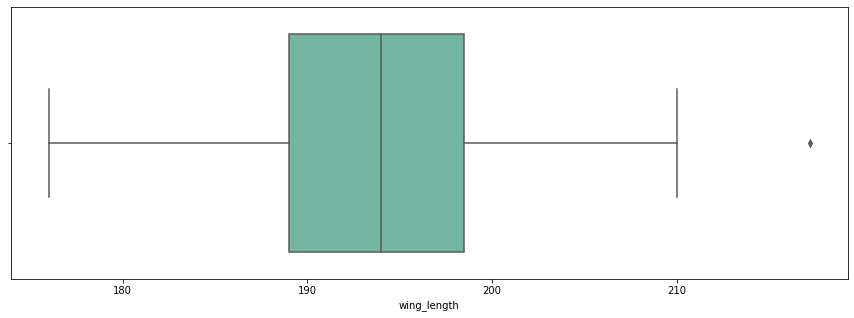

Q1 =  199.0  Q3 =  219.0  IQR =  20.0
169.0 > column < 249.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


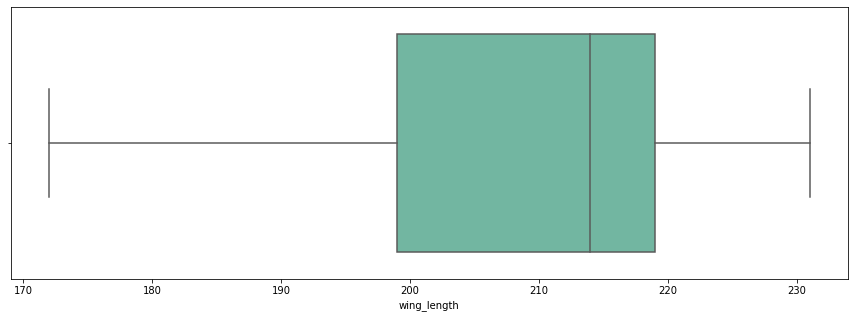

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Q1 =  190.0  Q3 =  199.0  IQR =  9.0
176.5 > column < 212.5


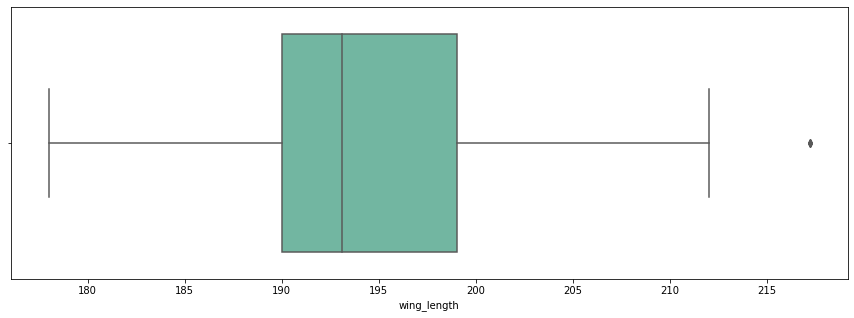

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Q1 =  193.0934959349595  Q3 =  213.5934959349595  IQR =  20.5
162.3434959349595 > column < 244.3434959349595


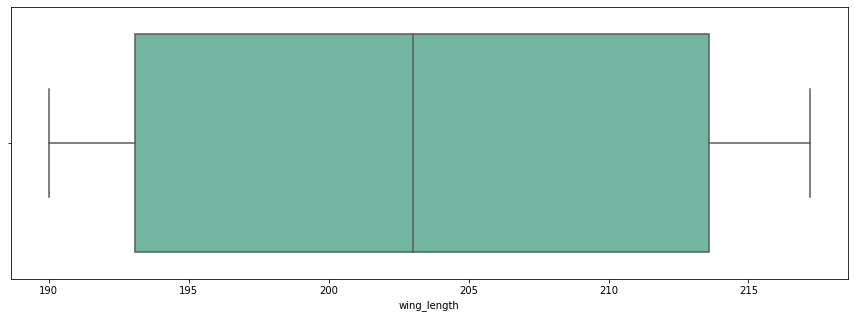

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
loc_1['wing_length']=series_outlier_check(loc_1['wing_length'])
loc_2['wing_length']=series_outlier_check(loc_2['wing_length'])
loc_3['wing_length']=series_outlier_check(loc_3['wing_length'])
loc_4['wing_length']=series_outlier_check(loc_4['wing_length'])

In [41]:
df=pd.concat([loc_1,loc_2,loc_3,loc_4],axis=0)

In [42]:
len(df)

434

In [43]:
df.isna().sum()

bill_depth     0
bill_length    0
wing_length    0
location       0
mass           0
sex            0
species        0
dtype: int64

bill_depth
Q1 =  15.225  Q3 =  18.9821138211382  IQR =  3.7571138211381996
9.589329268292701 > bill_depth < 24.6177845528455


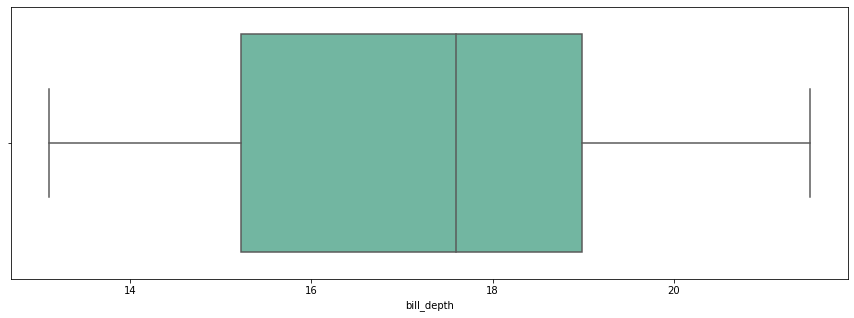

bill_length
Q1 =  45.2  Q3 =  47.98735949097828  IQR =  2.7873594909782753
41.01896076353259 > bill_length < 52.16839872744569


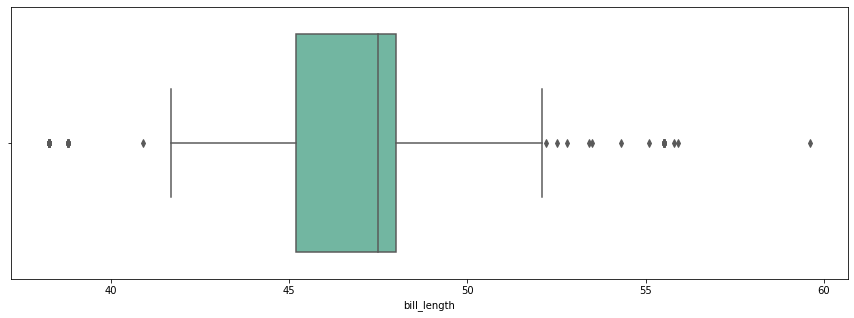

wing_length
Q1 =  196.36215342922662  Q3 =  214.65580799643612  IQR =  18.2936545672095
168.92167157841237 > wing_length < 242.09628984725038


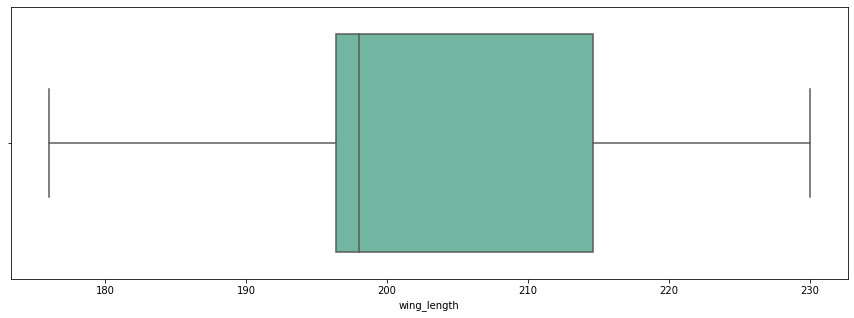

location
Q1 =  2.0  Q3 =  3.0  IQR =  1.0
0.5 > location < 4.5


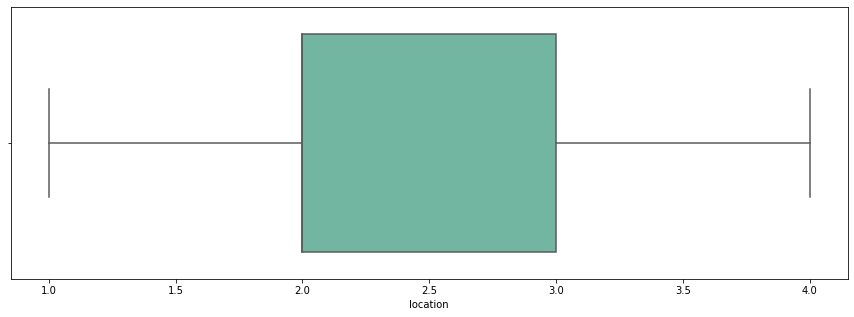

mass
Q1 =  3650.0  Q3 =  4750.0  IQR =  1100.0
2000.0 > mass < 6400.0


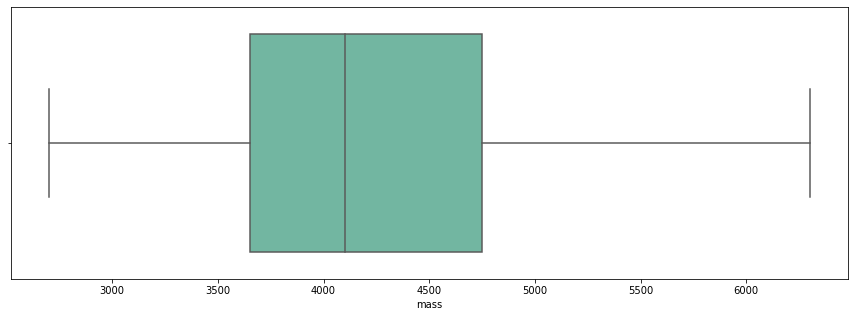

sex
Q1 =  0.0  Q3 =  1.0  IQR =  1.0
-1.5 > sex < 2.5


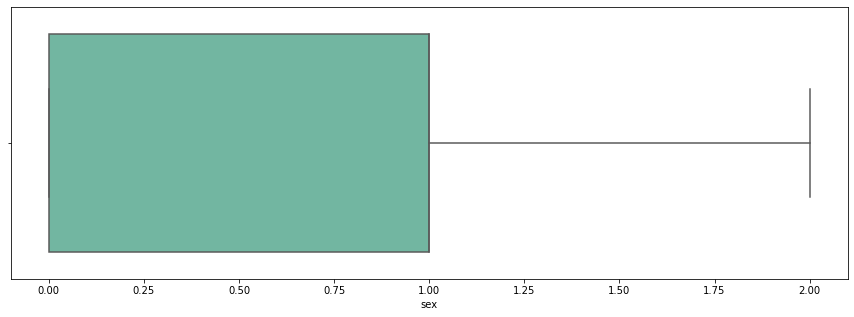

In [44]:
#remove outliers
df=outlier_remover(df)

In [45]:
len(df)

341

In [46]:
df.head()

,bill_depth,bill_length,wing_length,location,mass,sex,species
14,19.0,46.779753,199.000000,1,4000.0,1,A
16,21.5,46.779753,196.362153,1,4200.0,1,A
17,18.9,46.779753,196.362153,1,4150.0,1,A
22,21.2,46.779753,196.362153,1,3800.0,1,A
26,19.4,48.833824,194.000000,1,3525.0,1,B


In [47]:
#Modelling
x=df.drop('species',axis=1)
y=df['species']

In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

In [49]:
y_res.value_counts()

A    139
B    139
C    139
Name: species, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_res,y_res,random_state=42,test_size=0.2,stratify=y_res)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def evaluate(y,pred):
    print('Accuracy : ',accuracy_score(y,pred))
    print('classification report : ',classification_report(y,pred))
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y,pred),annot=True, fmt="f",cmap="YlGnBu",cbar=False)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
r_model.score(x_train,y_train)

1.0

In [55]:
np.random.seed(42)
r_model.score(x_valid,y_valid)

0.9523809523809523

Accuracy :  0.9523809523809523
classification report :                precision    recall  f1-score   support

           A       0.90      0.96      0.93        28
           B       0.96      0.89      0.93        28
           C       1.00      1.00      1.00        28

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



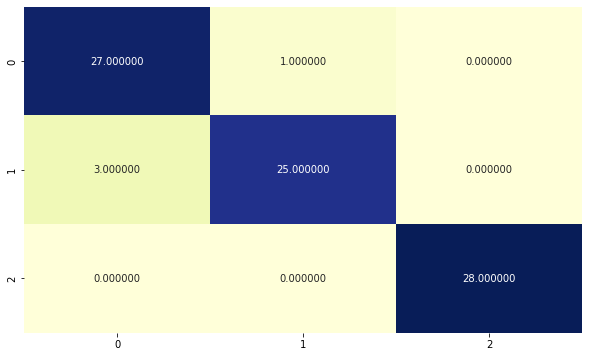

In [56]:
evaluate(y_valid,r_model.predict(x_valid))

In [58]:
test=pd.read_csv('../input/bird-species/test_set.csv')

In [59]:
test.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,2
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,5
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0,7
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,8
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0,9


In [60]:
test['location'].isna().sum()

6

In [62]:
test['location']=test['location'].fillna('loc_4')
test['location']=test['location'].apply(get_num)

IndexError: list index out of range

In [63]:
test['sex']=test['sex'].fillna('2')
test['sex']=test['sex'].astype('int')

In [64]:
test.head()

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.982114,38.259307,217.186992,2,5400.0,0,2
1,13.200000,46.100000,211.000000,2,4500.0,0,5
2,20.000000,NaN,197.000000,3,3300.0,1,7
3,17.500000,38.791391,190.000000,3,3900.0,2,8
4,18.900000,NaN,184.000000,2,3550.0,1,9


In [65]:
ID=test['ID']
test=test.drop('ID',axis=1)

In [66]:
test.head()

,bill_depth,bill_length,wing_length,location,mass,sex
0,14.982114,38.259307,217.186992,2,5400.0,0
1,13.200000,46.100000,211.000000,2,4500.0,0
2,20.000000,NaN,197.000000,3,3300.0,1
3,17.500000,38.791391,190.000000,3,3900.0,2
4,18.900000,NaN,184.000000,2,3550.0,1


In [67]:
test.isna().sum()

bill_depth      1
bill_length    41
wing_length    38
location        0
mass            1
sex             0
dtype: int64

In [68]:
test[test['mass'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex
90,NaN,NaN,NaN,2,NaN,2


In [69]:
test_species_mass=test[(test['sex']==2) & (test['location']==2)]['mass']

In [70]:
test_species_mass

13    3800.0
22    4100.0
74    4650.0
76    4850.0
90       NaN
Name: mass, dtype: float64

Q1 =  4025.0  Q3 =  4700.0  IQR =  675.0
3012.5 > column < 5712.5


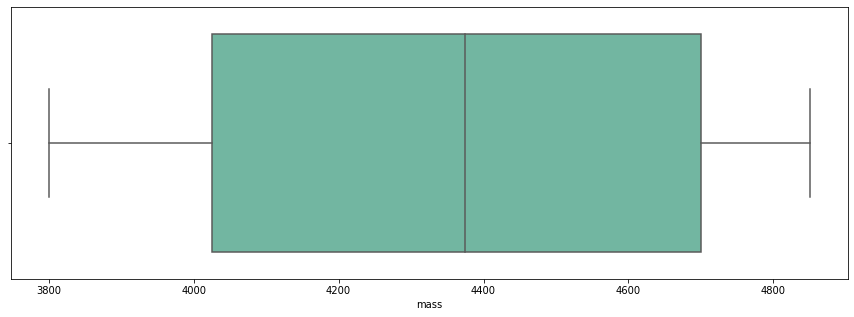

In [71]:
    Q1=test_species_mass.quantile(0.25)
    Q3=test_species_mass.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
    print(lower ,"> column <",upper)
    plt.figure(figsize=(15,5))
    sns.boxplot(test_species_mass,palette="Set2")
    plt.show()
    test['mass']=test['mass'].fillna((test_species_mass.mean()+Q3)/2)

In [72]:
test.isna().sum()

bill_depth      1
bill_length    41
wing_length    38
location        0
mass            0
sex             0
dtype: int64

In [73]:
test[test['bill_depth'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex
90,NaN,NaN,NaN,2,4525.0,2


In [74]:
test_species_mass=test[(test['sex']==2) & (test['location']==2)]['bill_depth']

Q1 =  14.375  Q3 =  15.961585365853649  IQR =  1.586585365853649
11.995121951219527 > column < 18.341463414634124


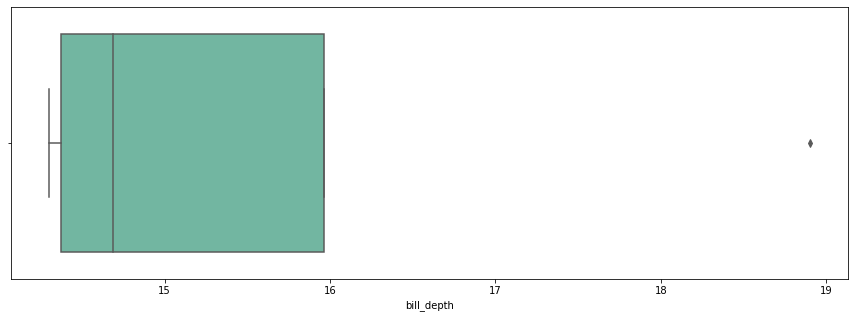

In [75]:
    Q1=test_species_mass.quantile(0.25)
    Q3=test_species_mass.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print("Q1 = ",Q1," Q3 = ",Q3," IQR = ",IQR)
    print(lower ,"> column <",upper)
    plt.figure(figsize=(15,5))
    sns.boxplot(test_species_mass,palette="Set2")
    plt.show()
    test['bill_depth']=test['bill_depth'].fillna((test_species_mass.mean()+Q3)/2)

In [76]:
test.isna().sum()

bill_depth      0
bill_length    41
wing_length    38
location        0
mass            0
sex             0
dtype: int64

In [77]:
test.head()

,bill_depth,bill_length,wing_length,location,mass,sex
0,14.982114,38.259307,217.186992,2,5400.0,0
1,13.200000,46.100000,211.000000,2,4500.0,0
2,20.000000,NaN,197.000000,3,3300.0,1
3,17.500000,38.791391,190.000000,3,3900.0,2
4,18.900000,NaN,184.000000,2,3550.0,1


In [78]:
test[test['wing_length'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex
5,18.982114,47.504878,NaN,3,4800.0,1
12,14.982114,47.504878,NaN,4,5550.0,0
15,20.300000,NaN,NaN,3,3550.0,1
18,18.600000,NaN,NaN,2,3550.0,1
19,14.982114,38.259307,NaN,2,4650.0,0
23,18.800000,NaN,NaN,3,3600.0,0
25,14.982114,47.504878,NaN,3,5700.0,1
29,14.982114,38.259307,NaN,3,5550.0,2
34,20.200000,NaN,NaN,1,4250.0,2
37,14.982114,38.259307,NaN,1,5850.0,0


In [79]:
test[test['bill_length'].isna()]

,bill_depth,bill_length,wing_length,location,mass,sex
2,20.000000,NaN,197.0,3,3300.0,1
4,18.900000,NaN,184.0,2,3550.0,1
8,17.100000,NaN,187.0,3,3700.0,0
11,17.900000,NaN,192.0,3,3500.0,0
15,20.300000,NaN,NaN,3,3550.0,1
16,20.000000,NaN,190.0,2,4250.0,1
18,18.600000,NaN,NaN,2,3550.0,1
23,18.800000,NaN,NaN,3,3600.0,0
33,18.500000,NaN,201.0,3,4000.0,1
34,20.200000,NaN,NaN,1,4250.0,2


In [80]:
loc_1=test[test['location']==1]
loc_2=test[test['location']==2]
loc_3=test[test['location']==3]
loc_4=test[test['location']==4]

In [81]:
loc_1['bill_length'].isna().sum()

8

In [82]:
loc_2['bill_length'].isna().sum()

15

In [83]:
loc_3['bill_length'].isna().sum()

18

In [84]:
loc_4['bill_length'].isna().sum()

0

Q1 =  38.39232796870458  Q3 =  48.50158715925397  IQR =  10.109259190549395
23.228439182880486 > column < 63.665475945078065


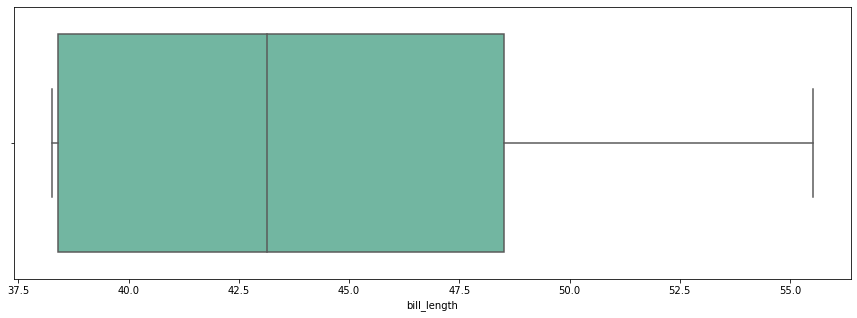

Q1 =  44.1182007284768  Q3 =  48.5  IQR =  4.3817992715231995
37.545501821192005 > column < 55.0726989072848


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


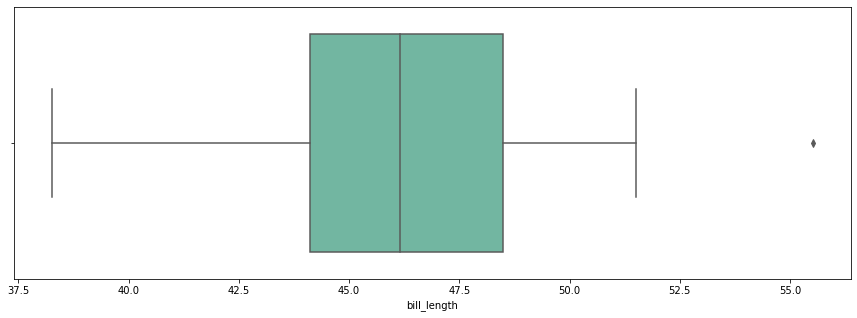

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Q1 =  43.3136505463576  Q3 =  49.875  IQR =  6.5613494536424
33.471626365894 > column < 59.717024180463596


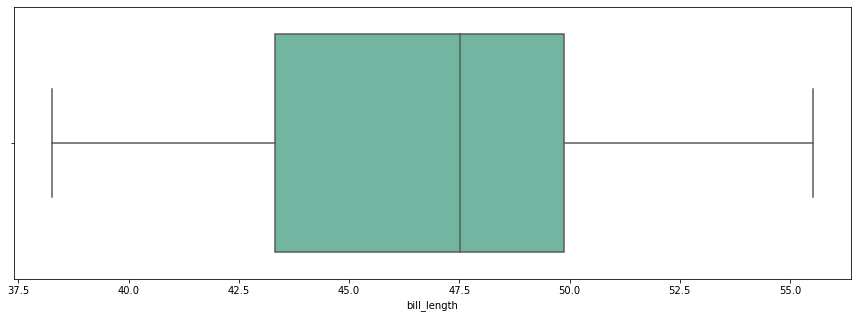

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
loc_1['bill_length']=series_outlier_check(loc_1['bill_length'])
loc_2['bill_length']=series_outlier_check(loc_2['bill_length'])
loc_3['bill_length']=series_outlier_check(loc_3['bill_length'])

In [86]:
loc_1['wing_length'].isna().sum()

9

In [87]:
loc_2['wing_length'].isna().sum()

13

In [88]:
loc_3['wing_length'].isna().sum()

13

In [89]:
loc_4['wing_length'].isna().sum()

3

Q1 =  190.0  Q3 =  198.0  IQR =  8.0
178.0 > column < 210.0


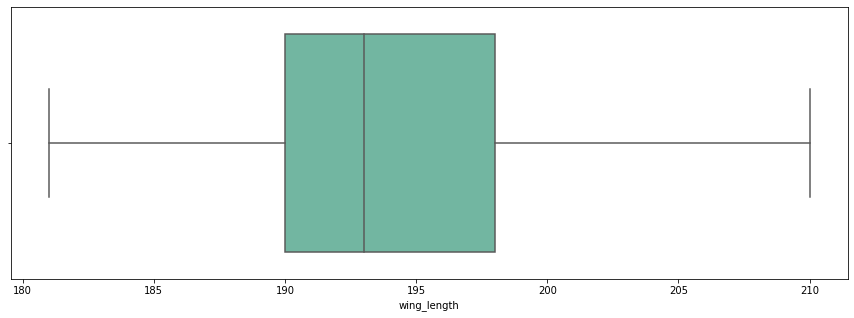

Q1 =  194.0  Q3 =  218.54674796747975  IQR =  24.546747967479746
157.17987804878038 > column < 255.36686991869936


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


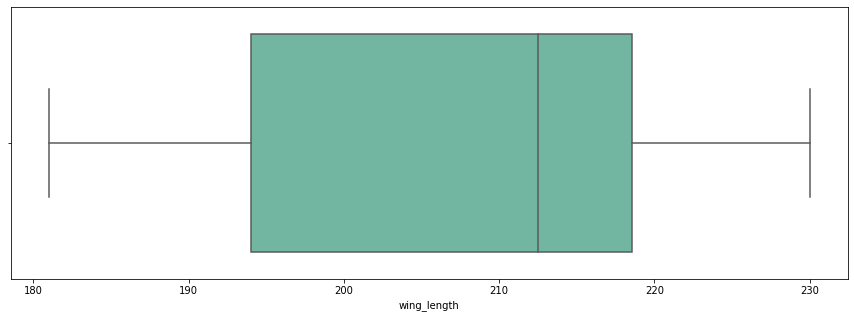

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Q1 =  188.0  Q3 =  197.0  IQR =  9.0
174.5 > column < 210.5


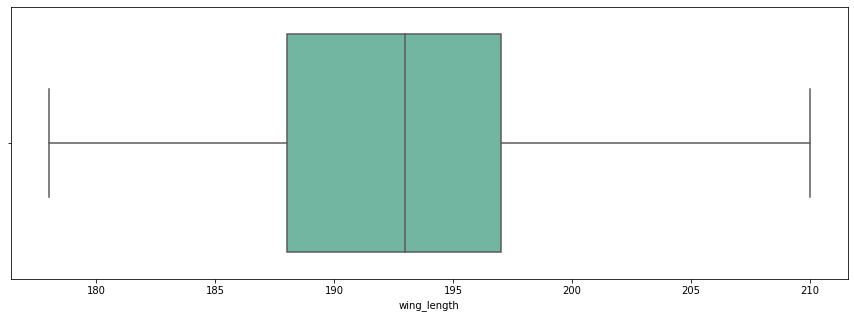

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Q1 =  192.0  Q3 =  201.0  IQR =  9.0
178.5 > column < 214.5


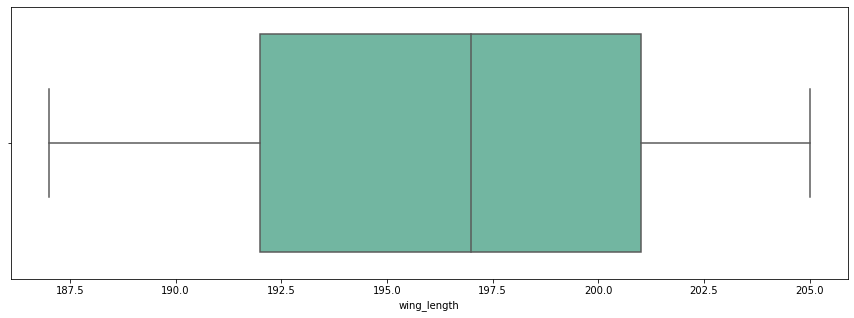

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
loc_1['wing_length']=series_outlier_check(loc_1['wing_length'])
loc_2['wing_length']=series_outlier_check(loc_2['wing_length'])
loc_3['wing_length']=series_outlier_check(loc_3['wing_length'])
loc_4['wing_length']=series_outlier_check(loc_4['wing_length'])

In [91]:
test=pd.concat([loc_1,loc_2,loc_3,loc_4],axis=0)

In [92]:
test.isna().sum()

bill_depth     0
bill_length    0
wing_length    0
location       0
mass           0
sex            0
dtype: int64

In [93]:
submission_df=pd.read_csv('../input/bird-species/solution_format.csv')
submission_df.head()

,ID,species
0,2,A
1,5,C
2,7,C
3,8,B
4,9,C


In [94]:
pred=r_model.predict(test)

In [95]:
submission=pd.DataFrame({'ID':ID,
                        'species':pred})

In [96]:
submission.head()

,ID,species
0,2,A
1,5,A
2,7,A
3,8,B
4,9,A


In [97]:
submission.to_csv('submission.csv',index=False)